## Day 22

https://adventofcode.com/2023/day/22

In [2]:
def readInput22(infile):
    with open(infile) as f:
        blocks = []
        for l in f.read().strip().splitlines():
            e = l.split("~")
            block = []
            for c0,c1 in zip(e[0].split(","),e[1].split(",")):
                block.append(range(int(c0),int(c1)+1))
            blocks.append(block)
    # sort blocks according to Z position! Needed for full input!
    blocks.sort(key=lambda x: x[2].start)
    return blocks

In [3]:
from collections import defaultdict

def block_to_space(block,space,value):
    rx, ry, rz = block
    for z in rz:
        for y in ry:
            for x in rx:
                space[(x,y,z)] = value

def fill_space(blocks):
    space = defaultdict(int)
    for i,b in enumerate(blocks):
        block_to_space(b,space,i+1)
    return space

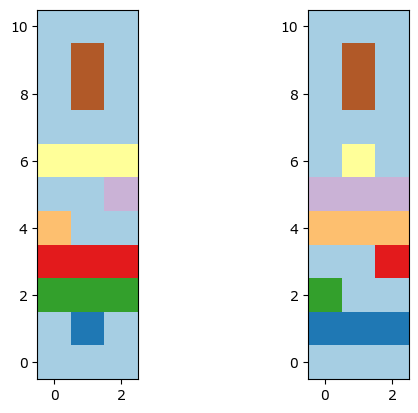

In [15]:
import matplotlib.pyplot as plt
import numpy as np

infile = "examples/example22.txt"
blocks = readInput22(infile)
space = fill_space(blocks)

XZ = np.zeros((11,3))
YZ = np.zeros((11,3))
for (x,y,z),v in space.items():
    XZ[z,x] = v
    YZ[z,y] = v

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(XZ,origin='lower',cmap="Paired")

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(YZ,origin='lower',cmap="Paired")

In [16]:
def drop_blocks(blocks,space,verbose=False):
    
    #blocks.sort(key=lambda x: x[2].start)
    
    blocksnew = []
    supported_by = defaultdict(set)
    
    for i in range(len(blocks)):
        
        b = blocks[i]
        if verbose:
            print("Trying to drop block",i+1,"...")

        while True:
            
            rx,ry,rz = b
            z0 = rz.start
            z1 = rz.stop
            
            if z0==1:
                if verbose:
                    print("Block {} reached floor, stopping.".format(i+1))
                supported_by[i+1].add(0)
                blocksnew.append(b)
                break

            
            rznew = range(z0-1,z1-1) # new Z coordinates

            # check space below block
            z = z0-1
            for y in ry:
                for x in rx:
                    if space[(x,y,z)]:
                        supported_by[i+1].add(space[(x,y,z)])
            
            if len(supported_by[i+1]):
                if verbose:
                    print("Block {} is now supported by block(s) {}".format(i+1,supported_by[i+1]))
                blocksnew.append(b)
                break
            else:
                if verbose:
                    print("Dropping to Z = {}".format(z0))
                bnew = [rx,ry,rznew]
                block_to_space(b,space,0)
                block_to_space(bnew,space,i+1)
                b = bnew

    # make dictionary of block supporting something from dictiony of what supports blocks
    supports = defaultdict(set)
    for b,sups in supported_by.items():
        for s in sups:
            supports[s].add(b)


    return blocksnew, supported_by, supports

In [17]:
blocks_static, supported_by, supports = drop_blocks(blocks,space,verbose=True)

Trying to drop block 1 ...
Block 1 reached floor, stopping.
Trying to drop block 2 ...
Block 2 is now supported by block(s) {1}
Trying to drop block 3 ...
Dropping to Z = 3
Block 3 is now supported by block(s) {1}
Trying to drop block 4 ...
Dropping to Z = 4
Block 4 is now supported by block(s) {2, 3}
Trying to drop block 5 ...
Dropping to Z = 5
Dropping to Z = 4
Block 5 is now supported by block(s) {2, 3}
Trying to drop block 6 ...
Dropping to Z = 6
Dropping to Z = 5
Block 6 is now supported by block(s) {4, 5}
Trying to drop block 7 ...
Dropping to Z = 8
Dropping to Z = 7
Dropping to Z = 6
Block 7 is now supported by block(s) {6}


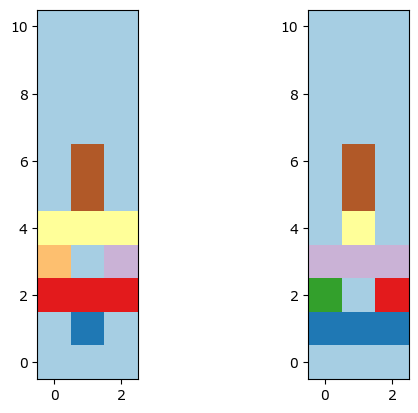

In [18]:
space = fill_space(blocks_static)

XZ = np.zeros((11,3))
YZ = np.zeros((11,3))
for (x,y,z),v in space.items():
    XZ[z,x] = v
    YZ[z,y] = v

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(XZ,origin='lower',cmap="Paired")

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(YZ,origin='lower',cmap="Paired")

In [19]:
def part1(infile):
    
    blocks = readInput22(infile)
    space = fill_space(blocks)
    blocks_static, supported_by, supports = drop_blocks(blocks,space)

    # check whether a block can be safely destroyed (only if supported blocks have alternative supports)
    can_be_destroyed = []
    for b,s in supports.items():
        if b==0:
            continue
        if all([ len(supported_by[bb])>1 for bb in s ] ):
            can_be_destroyed.append(b)

    # add blocks that do not support anythings
    support_something = set(supports.keys())#.remove(0)
    support_something.remove(0)
    are_supported = set(supported_by)
    can_be_destroyed = set(can_be_destroyed) 
    can_be_destroyed.update(are_supported - support_something)

    return len(can_be_destroyed)

In [20]:
print("Test 1:",part1("examples/example22.txt"))
print("Part 1:",part1("AOC2023inputs/input22.txt"))

Test 1: 5
Part 1: 505
